In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/spandan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
all_msks, hd_all = fits.getdata('B5_structureContourFile.fits', header=True)

## Separate regions

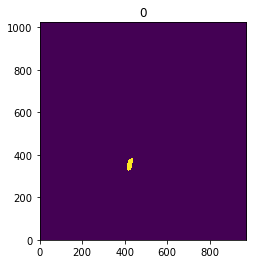

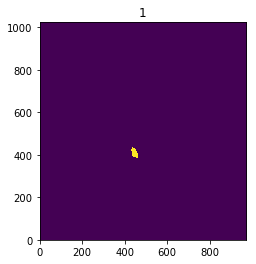

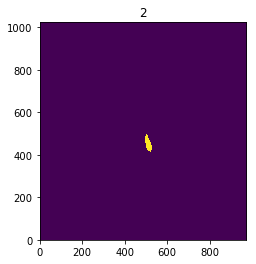

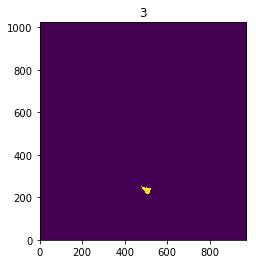

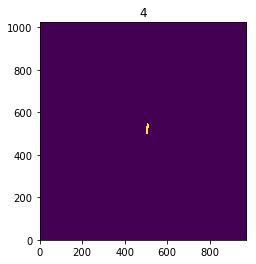

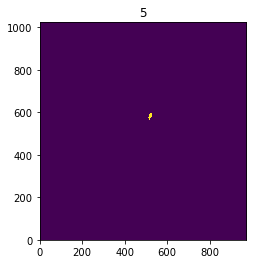

In [3]:
for i in range(12):
    if i not in [6,7,8,9,10,11]:
        plt.figure()
        plt.imshow(all_msks[i], origin='lower')
        plt.title(str(i))

In [4]:
clm1_n = all_msks[11]
clm2_mcr = all_msks[10]

fil1 = all_msks[7]
fil2 = all_msks[6]

In [5]:
prcnd1 = all_msks[5]
prcnd2 = all_msks[4]
prcnd3 = all_msks[3]

In [6]:
cnd1 = all_msks[2]
cnd2 = all_msks[1]
cnd3 = all_msks[0]

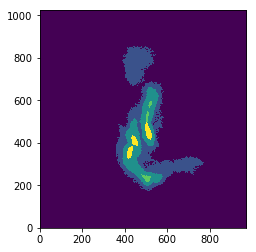

In [7]:
toge = (prcnd1+prcnd2+prcnd3)*10 + (cnd1+cnd2+cnd3)*20 + (fil1+fil2)*10 + (clm1_n+clm2_mcr)*10

plt.imshow(toge, origin='lower')

In [4]:
hd_all.remove('history', remove_all=True)

In [5]:
# hd_all

In [6]:
hd_indv = hd_all.copy()

In [7]:
hd_indv['naxis'] = 2

for itm in ['naxis3', 'ctype3', 'cdelt3', 'crval3', 'crpix3']:
    hd_indv.remove(itm)

In [12]:
fits.writeto('clm1_nrth.fits', clm1_n, hd_indv, overwrite=True)
fits.writeto('clm2_mn-cr.fits', clm2_mcr, hd_indv, overwrite=True)

fits.writeto('fil1.fits', fil1, hd_indv, overwrite=True)
fits.writeto('fil2.fits', fil2, hd_indv, overwrite=True)

fits.writeto('precnd1.fits', prcnd1, hd_indv, overwrite=True)
fits.writeto('precnd2.fits', prcnd2, hd_indv, overwrite=True)
fits.writeto('precnd3.fits', prcnd3, hd_indv, overwrite=True)

fits.writeto('cnd1.fits', cnd1, hd_indv, overwrite=True)
fits.writeto('cnd2.fits', cnd2, hd_indv, overwrite=True)
fits.writeto('cnd3.fits', cnd3, hd_indv, overwrite=True)

In [13]:
# hd_indv

### Regrid files to smoothed resolution

In [11]:
fil1 = fits.getdata('fil1.fits')
fil2 = fits.getdata('fil2.fits')

In [8]:
hd_sm = fits.getheader('../npeaks_cut5.fits')

In [9]:
hd_sm.remove('history', remove_all=True)

In [16]:
# hd_sm['naxis'] = 2

# for itm in ['naxis3', 'ctype3', 'cdelt3', 'crval3', 'crpix3','WCSAXES','CUNIT3']:
#     hd_sm.remove(itm)

In [10]:
from FITS_tools.hcongrid import hcongrid

new_clm1n = hcongrid(clm1_n, hd_indv, hd_sm)
new_clm2mcr = hcongrid(clm2_mcr, hd_indv, hd_sm)

new_fil1 = hcongrid(fil1, hd_indv, hd_sm)
new_fil2 = hcongrid(fil2, hd_indv, hd_sm)

new_prcnd1 = hcongrid(prcnd1, hd_indv, hd_sm)
new_prcnd2 = hcongrid(prcnd2, hd_indv, hd_sm)
new_prcnd3 = hcongrid(prcnd3, hd_indv, hd_sm)

new_cnd1 = hcongrid(cnd1, hd_indv, hd_sm)
new_cnd2 = hcongrid(cnd2, hd_indv, hd_sm)
new_cnd3 = hcongrid(cnd3, hd_indv, hd_sm)

NameError: name 'clm1_n' is not defined

In [12]:
new_fil1 = hcongrid(fil1, hd_indv, hd_sm)
new_fil2 = hcongrid(fil2, hd_indv, hd_sm)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


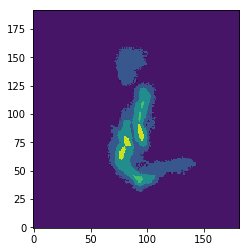

In [18]:
toge = ( (new_prcnd1+new_prcnd2+new_prcnd3)*10 + (new_cnd1+new_cnd2+new_cnd3)*20 + (new_fil1+new_fil2)*10 + 
        (new_clm1n+new_clm2mcr)*10)

plt.imshow(toge, origin='lower')

In [19]:
new_clm1n = (new_clm1n > 0.5) *1
new_clm2mcr = (new_clm2mcr > 0.5) *1

new_fil1 = (new_fil1 > 0.5) *1
new_fil2 = (new_fil2 > 0.5) *1

new_cnd1 = (new_cnd1 > 0.5) *1
new_cnd2 = (new_cnd2 > 0.5) *1
new_cnd3 = (new_cnd3 > 0.5) *1

new_prcnd1 = (new_prcnd1 > 0.5) *1
new_prcnd2 = (new_prcnd2 > 0.5) *1
new_prcnd3 = (new_prcnd3 > 0.5) *1

In [13]:
new_fil1 = (new_fil1 > 0.5) *1
new_fil2 = (new_fil2 > 0.5) *1

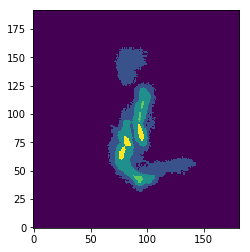

In [20]:
toge = ( (new_prcnd1+new_prcnd2+new_prcnd3)*10 + (new_cnd1+new_cnd2+new_cnd3)*20 + (new_fil1+new_fil2)*10 + 
        (new_clm1n+new_clm2mcr)*10)

plt.imshow(toge, origin='lower')

In [21]:
fits.writeto('clm1_nrth_rgrd.fits', new_clm1n, hd_sm, overwrite=True)
fits.writeto('clm2_mn-cr_rgrd.fits', new_clm2mcr, hd_sm, overwrite=True)

fits.writeto('fil1_rgrd.fits', new_fil1, hd_sm, overwrite=True)
fits.writeto('fil2_rgrd.fits', new_fil2, hd_sm, overwrite=True)

fits.writeto('precnd1_rgrd.fits', new_prcnd1, hd_sm, overwrite=True)
fits.writeto('precnd2_rgrd.fits', new_prcnd2, hd_sm, overwrite=True)
fits.writeto('precnd3_rgrd.fits', new_prcnd3, hd_sm, overwrite=True)

fits.writeto('cnd1_rgrd.fits', new_cnd1, hd_sm, overwrite=True)
fits.writeto('cnd2_rgrd.fits', new_cnd2, hd_sm, overwrite=True)
fits.writeto('cnd3_rgrd.fits', new_cnd3, hd_sm, overwrite=True)

In [14]:
fits.writeto('fil1_rgrd.fits', new_fil1, hd_sm, overwrite=True)
fits.writeto('fil2_rgrd.fits', new_fil2, hd_sm, overwrite=True)